<a href="https://colab.research.google.com/github/matheusortiz/hill-climbing-em-subconjuntos/blob/main/Ortiz_TrabHillClimb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from random import randint, sample
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [ ]:
def get_accuracy(y_test, yhat):
	return accuracy_score(y_test, yhat)

# modifica o atual conjunto de predições
def set_pred(current, n_changes=1):
	updated = current.copy()
	for i in range(n_changes):
		ix = randint(0, len(updated)-1)
		updated[ix] = 1 - updated[ix]
	return updated

# roda o hill climb para um conjunto de predições
def hill_climb_testset(X_test, y_test, max_iterations):
	scores = list()
	# gera aleatoriamente a solução inicial
	solution = [randint(0, 1) for _ in range(X_test.shape[0])]
	score = get_accuracy(y_test, solution)
	scores.append(score)
	# subida até a solução
	for i in range(max_iterations):
		scores.append(score)
		# interrompe se achar o melhor resultado
		if score == 1.0:
			break

		candidate = set_pred(solution)
		# avalia o candidato
		value = get_accuracy(y_test, candidate)
		if value >= score:
			solution, score = candidate, value
			# imprime acurácia a cada iteração
			# print('>%d, score=%.3f' % (i, score))
	return solution, scores

In [ ]:
def load_dataset():
  # importa o dataset
  ds = datasets.load_breast_cancer()

  X = pd.DataFrame(data=ds.data)
  y = pd.DataFrame(data=ds.target)

  return X, y

In [ ]:
a, b = load_dataset()

In [ ]:
def fit(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  # roda hill climb
  solution, scores = hill_climb_testset(X_test, y_test, 500)

  # imprime o melhor score (última acurácia)
  print('Acurácia: ', scores[len(scores)-1])

  # imprime gráfico de acurácia
  pyplot.plot(scores)
  pyplot.show()

  return scores[len(scores)-1]



def sort_subset():

  X, y = load_dataset()

  cont = 1
  b_score = [0,0]

  while True:

    if cont == 1:
      # gera o número de atributos aleatoriamente
      k = randint(1, X.shape[1])
      # gera os indices dos atributos aleatoriamente 
      ki = sample(range(0, X.shape[1]), k)
      print('k = ', k)
      print('ki = ', ki)

      subsetX = pd.DataFrame()

      # atribui os atributos gerados ao dataframe
      for i in ki:
        subsetX[i] = X.iloc[:,i]

      # armazena indices não utilizados pelo subset
      unused = []
      for i in range(X.shape[1]):
        if i not in ki:
          unused.append(i)
      print('unused = ', unused)

      print('Conjunto inicial: ')
      score = fit(subsetX, y)

    else:
      
      # sorteio para adicionar ou remover atributos
      if randint(0,1) == 0:
        # adiciona um atributo aleatório
        new_k = sample(unused, 1)
        subsetX[new_k] = X.iloc[:,new_k]
        ki.append(new_k[0])
        unused.remove(new_k[0])
        print('Adicionado um atributo')
        print('ki = ', ki)
        print('unused = ', unused)
      else:
        # remove atributo aleatório
        del_k = sample(ki, 1)
        subsetX = subsetX.drop(columns=del_k)
        ki.remove(del_k[0])
        print('Removido um atributo')
        print('ki = ', ki)
        print('unused = ', unused)
      

      print('Conjunto após alteração: ')
      score = fit(subsetX, y)

    if b_score[1] < score:
      b_score[0] = ki
      b_score[1] = score


    if score == 1 or unused == [] or ki == [] or subsetX.shape[1] == X.shape[1]:
      break

    cont += 1

  return b_score

k =  25
ki =  [28, 23, 29, 9, 27, 0, 25, 15, 3, 12, 20, 11, 16, 8, 1, 22, 19, 7, 13, 14, 17, 6, 5, 2, 4]
unused =  [10, 18, 21, 24, 26]
Conjunto inicial: 
(398, 25) (171, 25) (398, 1) (171, 1)
Acurácia:  0.9590643274853801


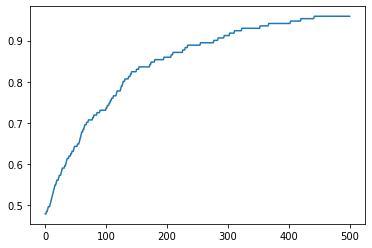

Adicionado um atributo
ki =  [28, 23, 29, 9, 27, 0, 25, 15, 3, 12, 20, 11, 16, 8, 1, 22, 19, 7, 13, 14, 17, 6, 5, 2, 4, 21]
unused =  [10, 18, 24, 26]
Conjunto após alteração: 
(398, 26) (171, 26) (398, 1) (171, 1)
Acurácia:  0.9707602339181286


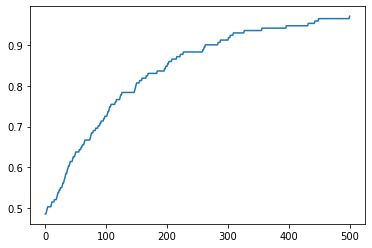

Adicionado um atributo
ki =  [28, 23, 29, 9, 27, 0, 25, 15, 3, 12, 20, 11, 16, 8, 1, 22, 19, 7, 13, 14, 17, 6, 5, 2, 4, 21, 24]
unused =  [10, 18, 26]
Conjunto após alteração: 
(398, 27) (171, 27) (398, 1) (171, 1)
Acurácia:  0.9824561403508771


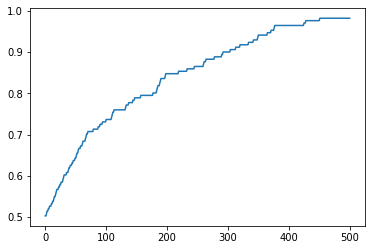

Removido um atributo
ki =  [28, 23, 29, 9, 27, 0, 25, 15, 3, 12, 20, 11, 16, 8, 1, 22, 19, 7, 13, 14, 17, 6, 5, 4, 21, 24]
unused =  [10, 18, 26]
Conjunto após alteração: 
(398, 26) (171, 26) (398, 1) (171, 1)
Acurácia:  0.9766081871345029


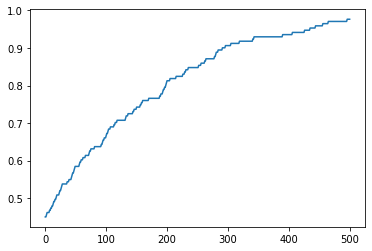

Removido um atributo
ki =  [28, 23, 29, 9, 27, 0, 25, 15, 3, 12, 20, 11, 16, 8, 1, 22, 19, 7, 13, 14, 6, 5, 4, 21, 24]
unused =  [10, 18, 26]
Conjunto após alteração: 
(398, 25) (171, 25) (398, 1) (171, 1)
Acurácia:  0.9649122807017544


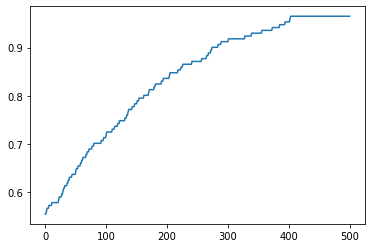

Removido um atributo
ki =  [28, 23, 9, 27, 0, 25, 15, 3, 12, 20, 11, 16, 8, 1, 22, 19, 7, 13, 14, 6, 5, 4, 21, 24]
unused =  [10, 18, 26]
Conjunto após alteração: 
(398, 24) (171, 24) (398, 1) (171, 1)
Acurácia:  0.9766081871345029


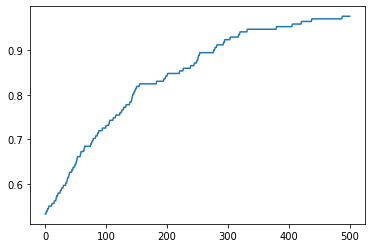

Removido um atributo
ki =  [28, 23, 9, 27, 0, 25, 15, 3, 12, 20, 11, 16, 8, 1, 22, 7, 13, 14, 6, 5, 4, 21, 24]
unused =  [10, 18, 26]
Conjunto após alteração: 
(398, 23) (171, 23) (398, 1) (171, 1)
Acurácia:  0.9824561403508771


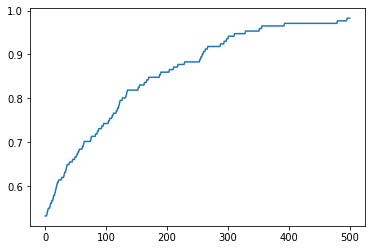

Adicionado um atributo
ki =  [28, 23, 9, 27, 0, 25, 15, 3, 12, 20, 11, 16, 8, 1, 22, 7, 13, 14, 6, 5, 4, 21, 24, 10]
unused =  [18, 26]
Conjunto após alteração: 
(398, 24) (171, 24) (398, 1) (171, 1)
Acurácia:  0.9707602339181286


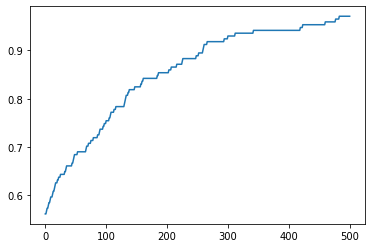

Removido um atributo
ki =  [28, 23, 9, 27, 0, 25, 15, 3, 20, 11, 16, 8, 1, 22, 7, 13, 14, 6, 5, 4, 21, 24, 10]
unused =  [18, 26]
Conjunto após alteração: 
(398, 23) (171, 23) (398, 1) (171, 1)
Acurácia:  0.9766081871345029


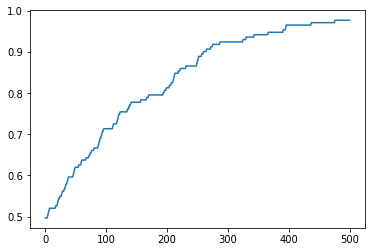

Adicionado um atributo
ki =  [28, 23, 9, 27, 0, 25, 15, 3, 20, 11, 16, 8, 1, 22, 7, 13, 14, 6, 5, 4, 21, 24, 10, 26]
unused =  [18]
Conjunto após alteração: 
(398, 24) (171, 24) (398, 1) (171, 1)
Acurácia:  0.9707602339181286


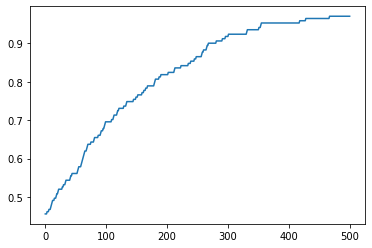

Adicionado um atributo
ki =  [28, 23, 9, 27, 0, 25, 15, 3, 20, 11, 16, 8, 1, 22, 7, 13, 14, 6, 5, 4, 21, 24, 10, 26, 18]
unused =  []
Conjunto após alteração: 
(398, 25) (171, 25) (398, 1) (171, 1)
Acurácia:  0.9766081871345029


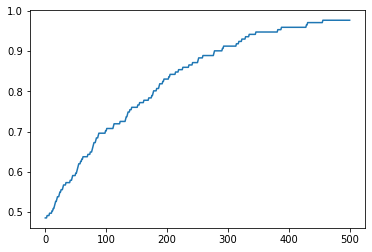

---
Melhor sub-conjunto:  [28, 23, 9, 27, 0, 25, 15, 3, 20, 11, 16, 8, 1, 22, 7, 13, 14, 6, 5, 4, 21, 24, 10, 26, 18]
Número de parâmetros:  25
Acurácia:  0.9824561403508771


In [ ]:
r = sort_subset()
print('---')
print('Melhor sub-conjunto: ', r[0])
print('Número de parâmetros: ', len(r[0]))
print('Acurácia: ', r[1])